# Emotion Detection from Text using Scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelBinarizer
from joblib import dump, load

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv("emotion_dataset_raw.csv")
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


## Data Preprocessing

In [3]:
# Clean text
df['clean_text'] = df['Text'].apply(nfx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)
df.head()

,Emotion,Text,clean_text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...


## Feature Extraction and Train-Test Split

In [4]:
X = df['clean_text']
y = df['Emotion']

# TF-IDF Vectorizer
tfidf = TfidfVectorizer()
X_vect = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

## Train a Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Save model and vectorizer
dump(model, "emotion_model.joblib")
dump(tfidf, "tfidf_vectorizer.joblib")

## Model Evaluation

              precision    recall  f1-score   support

       anger       0.56      0.51      0.54       836
     disgust       0.60      0.17      0.26       202
        fear       0.76      0.64      0.69      1104
         joy       0.57      0.79      0.66      2214
     neutral       0.51      0.70      0.59       481
     sadness       0.62      0.48      0.54      1327
       shame       0.86      0.83      0.84        23
    surprise       0.61      0.32      0.42       772

    accuracy                           0.60      6959
   macro avg       0.64      0.55      0.57      6959
weighted avg       0.61      0.60      0.59      6959



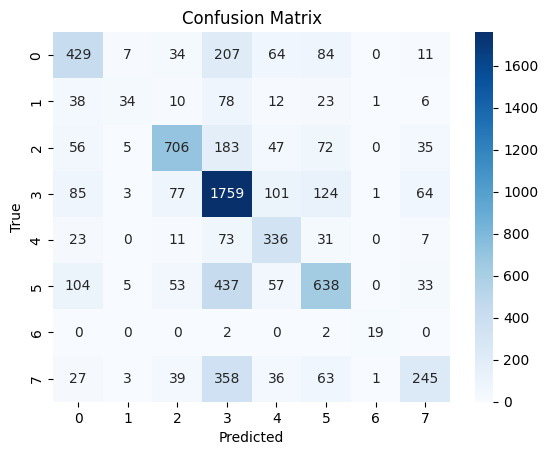

In [6]:
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## ROC and Precision-Recall Curve

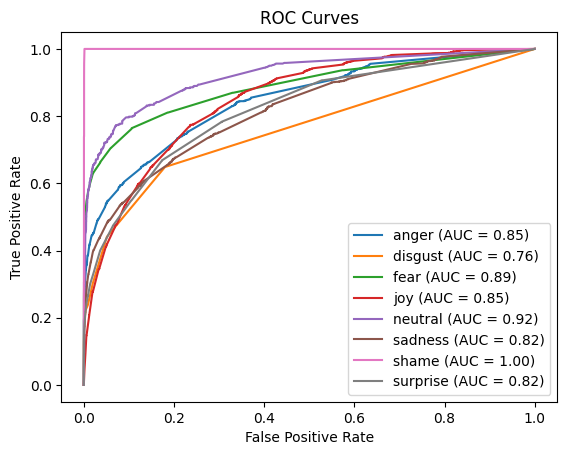

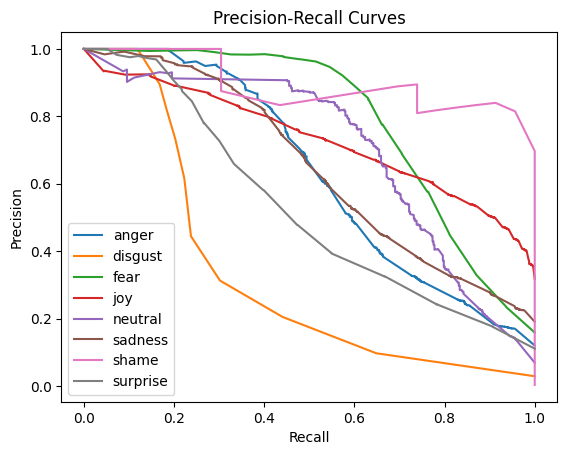

In [11]:
# Convert labels to binary format
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_prob = model.predict_proba(X_test)

# Plot ROC for each class
for i, class_label in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i]):.2f})")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
for i, class_label in enumerate(lb.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=class_label)
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

## Demo: Predict Emotion for a New Text

In [ ]:
# Load the saved model and vectorizer
model = load("emotion_model.joblib")
vectorizer = load("tfidf_vectorizer.joblib")

def predict_emotion(text):
    cleaned = nfx.remove_stopwords(nfx.remove_userhandles(nfx.remove_punctuations(text)))
    vect_text = vectorizer.transform([cleaned])
    prediction = model.predict(vect_text)
    return prediction[0]

# Test prediction
predict_emotion("")

'joy'